In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools

In [13]:
avgs_df = pd.read_csv(os.path.join("data","lebron_james_avg_stats.csv"))
avgs_df.head()

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0


In [14]:
avgs_df["Age"].max()

35.0

In [15]:
def age_cat(age):
    if age < 27:
        return "young"
    elif age < 34:
        return "middle-aged"
    return "older"

In [16]:
avgs_df["Age Category"] = avgs_df["Age"].apply(lambda x: age_cat(x))

<h2>Overall Offensive Analysis</h2>

In [17]:
imprt_cols = ["TRB","AST","PTS","FG%","Age Category"]
imprt_cols

['TRB', 'AST', 'PTS', 'FG%', 'Age Category']

In [18]:
imprt_df = avgs_df[imprt_cols]

<Figure size 1440x1440 with 0 Axes>

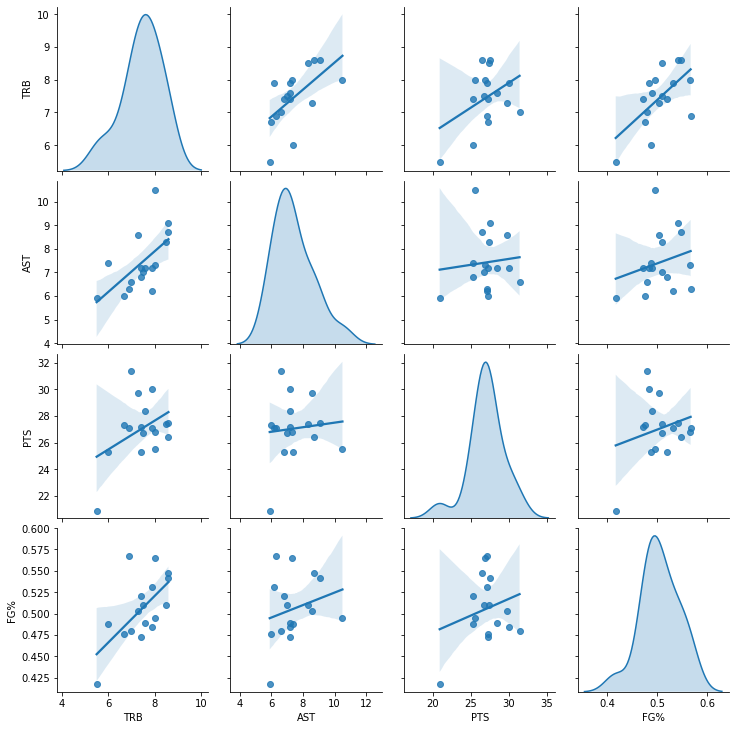

In [19]:
fig = plt.figure(1,(20,20))
sns.pairplot(imprt_df,diag_kind="kde",kind="reg")

<h4>Insights</h4>
<ul>
    <li>Amongst all the basic statistics, Lebron James has a positive correlation with all other statistics</li>
    <li>Overall, FG% has a rather normal distribution</li>
    <li>Assists has a slightly left-skew and Total Rebounds has a slight right-skew</li>
    <li>Points is bi-modal with a peak at about 28 points per game</li>
</ul>

<h4>Because the pairplot has positive correlations amongst all the basic numerical statistics, we can examine how these patterns change by age category.</h4>

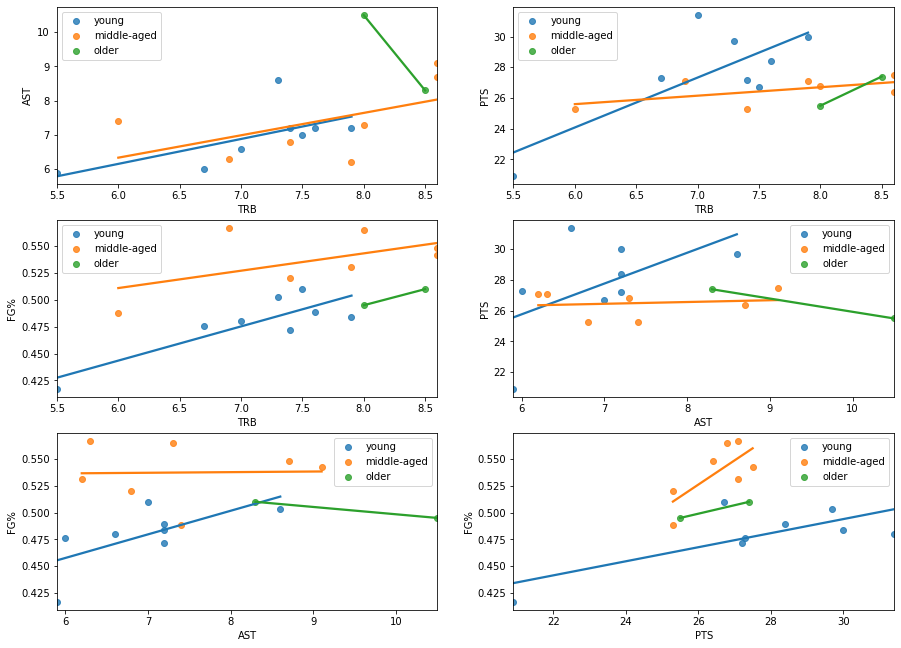

In [20]:
plt.figure(1,(15,15))
imprt_cols.remove("Age Category")
basic_num_combos = itertools.combinations(imprt_cols,2)
basic_num_combos = [basic_num_combo for basic_num_combo in basic_num_combos]
basic_num_combos_len = len(basic_num_combos)
i = 0
for basic_num_combo in basic_num_combos:
    i += 1
    ax = plt.subplot(1+(basic_num_combos_len//2),2,i)
    for age_cat in avgs_df["Age Category"].unique():
        data = avgs_df[avgs_df["Age Category"] == age_cat]
        sns.regplot(x=basic_num_combo[0],y=basic_num_combo[1],data=data,ci=None,label=age_cat)
    ax.legend()
imprt_cols.append('Age Category')
plt.show()

<h4>Insights</h4>
<ul>
    <li>In the elder stages of his career, 3 out of the 6 statistics have a negative correlation, implying Lebron James may be specializing in certain skillsets</li>
    <li>In his the young and middle stages of his career, all the basic statistics have a positive correlation</li>
    <li>Lebron increased his average number of assists while maintaining his field goal percentage</li>
    <li>At every stage of his career, an increase in James' points per game is also complemented with an increase in field goal percentage</li>
</ul>
<i>*Note: Keep in mind that the elder age category only contain data for 3 years whereas the other 2 categories have data for at least 6 years.</i>

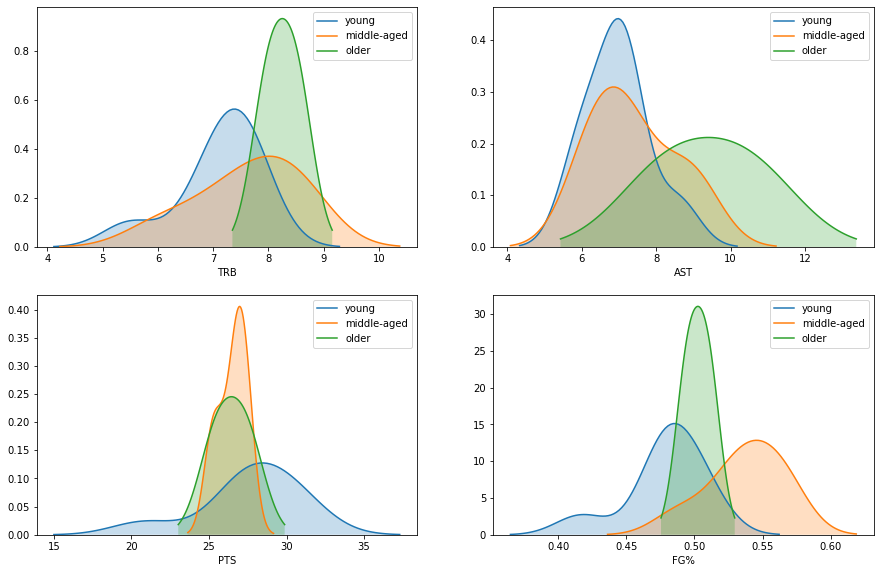

In [34]:
fig = plt.figure(1,(15,15))
i = 0
for imprt_col in imprt_cols:
    if imprt_col == "Age Category":
        continue
    i+=1
    ax = plt.subplot(1+(len(imprt_cols)//2),2,i)
    for age_cat in avgs_df["Age Category"].unique():
        data = avgs_df[avgs_df["Age Category"]==age_cat][imprt_col]
        sns.kdeplot(data,shade=True,label=age_cat)
    ax.set_xlabel(imprt_col)
plt.show()

In [49]:
def get_outlier_index(df,col):
    data = df[col].values
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    
    iqr = q3 - q1
    
    min_range = q1-(1.5*iqr)
    max_range = q3+(1.5*iqr)
    
    outliers = df[(df[col]<min_range) | (df[col]>max_range)]
    return outliers.index

In [53]:
imprt_cols.remove("Age Category")
for imprt_col in imprt_cols:
    outliers_indices = get_outlier_index(avgs_df,imprt_col)
    outliers_data = avgs_df.iloc[outliers_indices]
    print(f"{imprt_col} has {len(outliers_data)} outliers")
imprt_cols.append("Age Category")

TRB has 0 outliers
AST has 0 outliers
PTS has 4 outliers
FG% has 0 outliers


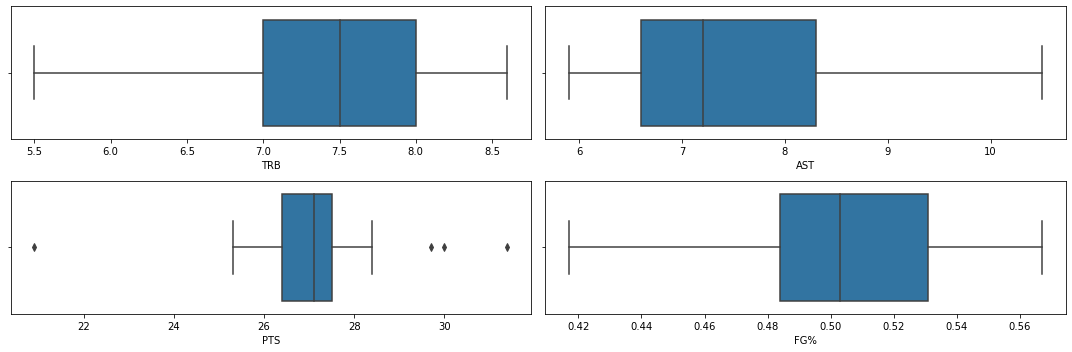

In [41]:
fig = plt.figure(1,(15,5))
i = 0
for imprt_col in imprt_cols:
    if imprt_col == "Age Category":
        continue
    i += 1
    ax = plt.subplot(2,2,i)
    ax.set_xlabel(imprt_col)
    sns.boxplot(x=imprt_col, data=avgs_df)
    plt.tight_layout()
plt.show()

<h4>Insights</h4>
<ul>
    <li>Lebron James' scoring statistics peaked at his younger and middle-aged stages of his career</li>
    <li>In the younger and middle stages of his career, his assists averaged about 6.5-7 assists per games, whereas in the older stages in his career, this increased to about 9 assists per game.</li>
    <li>This implies his focus slightly shifted from scoring to passsing as his career passed.</li>
    <li>His total rebounds also increased as he aged, increasing from about 7-8 rebounds per game to about 8.5 rebounds per game</li>
    <li>Points per game contains 4 outliers, while the other basic statistics do not have any.</li>
</ul> 

In [22]:
def corr_cats(orig_corr_df):
    corr_df = orig_corr_df.copy(deep=True)
    for row in range(len(corr_df)):
        for col in range(len(corr_df.iloc[0])):
            val = corr_df.iloc[row,col]
            neg = val < 0
            val = abs(val)
            new_val = 0
            if val < 0.1:
                pass
            elif val < 0.3:
                val = 0.3
            elif val < 0.5:
                new_val = 0.5
            elif val < 0.7:
                new_val = 0.7
            else:
                new_val = 1
            if neg:
                new_val *= -1
            corr_df.iloc[row,col] = new_val
    return corr_df

def filter_high_corr(orig_corr_df, corr_cutoff):
    corr_df = orig_corr_df.copy(deep=True)
    for row in range(len(corr_df)):
        for col in range(len(corr_df.iloc[0])):
            if corr_df.iloc[row,col] >= corr_cutoff:
                corr_df.iloc[row,col] = 1
            elif corr_df.iloc[row,col] <= -corr_cutoff:
                corr_df.iloc[row,col] = -1
            else:
                corr_df.iloc[row,col] = 0
    return corr_df

c:\users\kambo\.virtualenvs\lebronjames-q3tyihsg\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


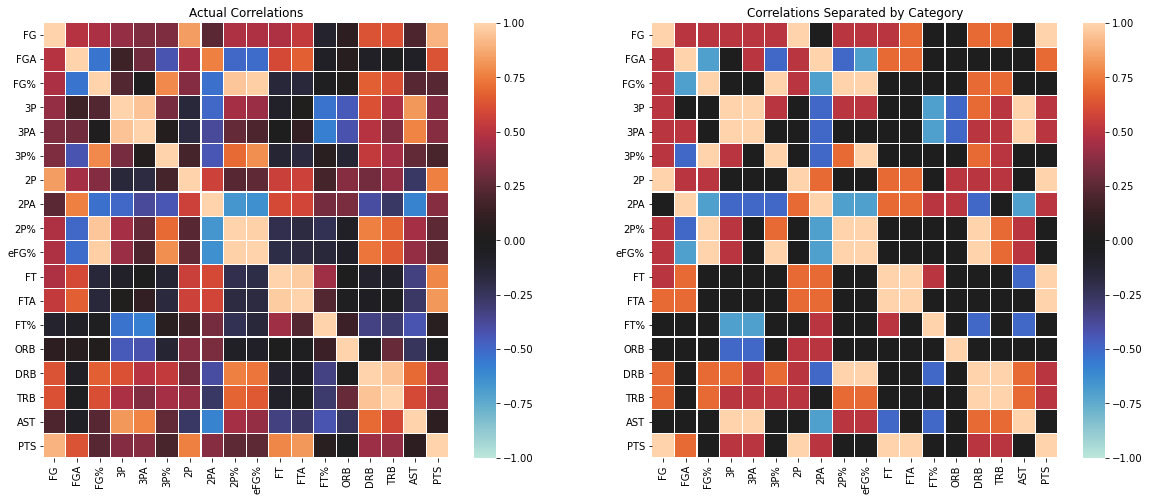

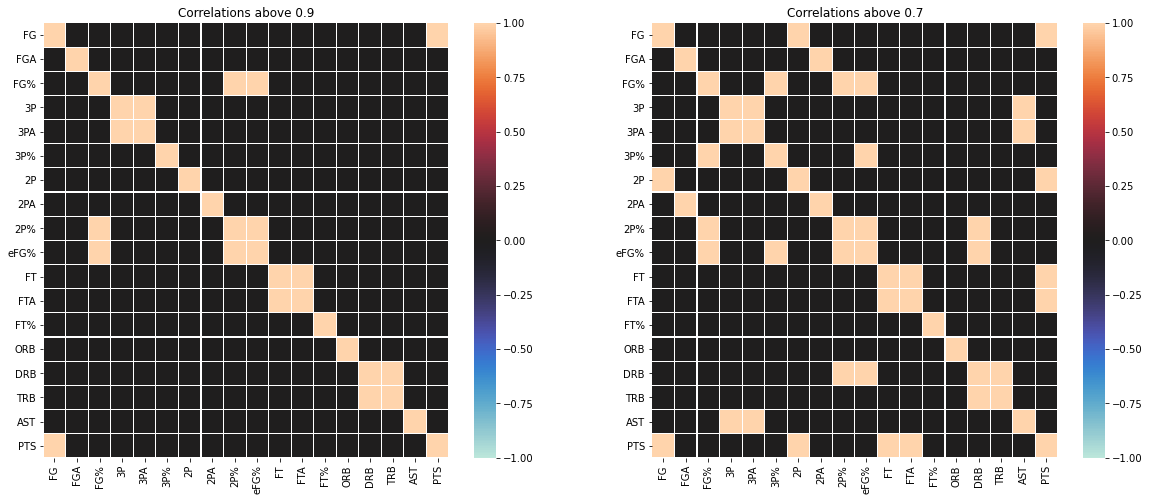

In [23]:
num_df = avgs_df.select_dtypes(exclude=["object"])
num_df.drop(["Age","G","GS","MP", "PF","TOV","BLK","STL"],axis=1,inplace=True)

corrs = num_df.corr()
fig = plt.figure(1,(20,8))
ax = plt.subplot(1,2,1)
ax.set_title("Actual Correlations")
sns.heatmap(corrs,vmin=-1,vmax=1, center=0, linewidth=0.1)

ax = plt.subplot(1,2,2)
ax.set_title("Correlations Separated by Category")
nums_corrs_cats_df = corr_cats(corrs)
sns.heatmap(nums_corrs_cats_df,vmin=-1,vmax=1, center=0, linewidth=0.1)
plt.show()

fig = plt.figure(1,(20,8))
ax = plt.subplot(1,2,1)
corr_cutoff = 0.9
ax.set_title(f"Correlations above {corr_cutoff}")
high_corr_df = filter_high_corr(corrs, corr_cutoff)
sns.heatmap(high_corr_df,vmin=-1,vmax=1, center = 0, linewidth=0.1)

ax = plt.subplot(1,2,2)
corr_cutoff = 0.7
ax.set_title(f"Correlations above {corr_cutoff}")
high_corr_df = filter_high_corr(corrs, corr_cutoff)
sns.heatmap(high_corr_df,vmin=-1,vmax=1, center = 0, linewidth=0.1)


plt.show()

<h4>Insights</h4>
<ul>
    <li>Field goals amde and PTS per game have an extremely high correlation</li>
    <li>FG%, 2P%, and eFG% all have above a 90% correlation with each other</li>
    <li>Three pointers made and three pointers attempted also have above a 90% correlation, this likely implies Lebron's ratio of made 3s to missed 3s remains relatively constant</li>
    <li>There is a strong correlation between total rebounds and defensive rebounds, implying Lebron gets most of rebounds defensively</li>
    <li>Overall, we can see there is not too many features that have significant correlations with others, which is ideal for machine learning</li>
    <li>Almost all the scoring percentages, besides free throw percentage, have more than 70% correlation</li>
</ul>
<i>*Note: The cutoffs in these situations are 0.7 and 0.9 since this is a high enough correlation to drop a feature without losing significant insights.</i>

<h2>In-depth Offensive and Scoring Efficiency Analysis</h2>

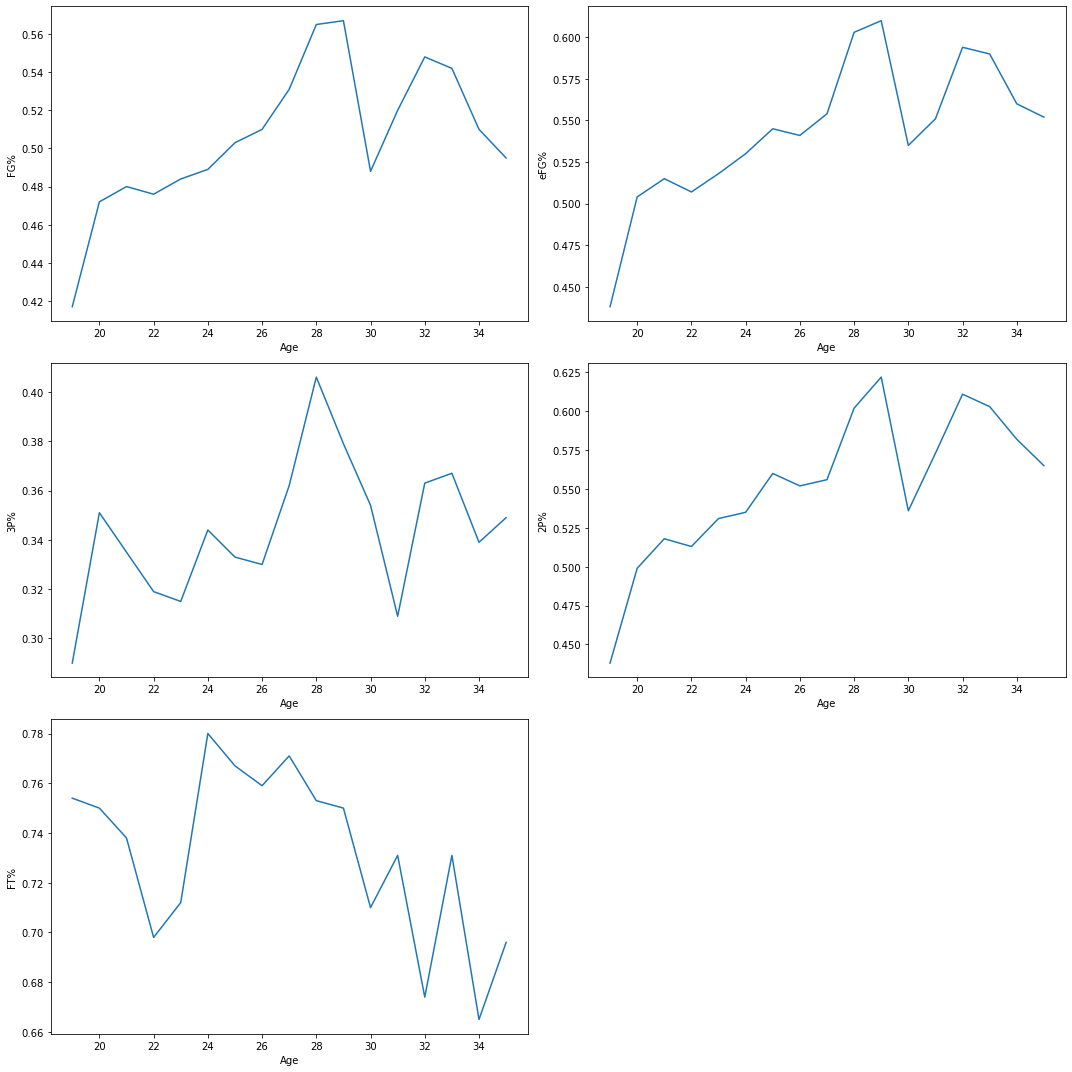

In [64]:
percentage_cols = ["FG%","eFG%","3P%","2P%","FT%"]
fig = plt.figure(1,(15,15))
i = 0
for col in percentage_cols:
    i += 1
    ax = plt.subplot(3,2,i)
    sns.lineplot(x="Age",y=col,data=avgs_df)
    plt.tight_layout()
plt.show()

<h4>Insights</h4>
<ul>
    <li>As seen in the correlation heatmaps, 3P%, 2P%, eFG%, and FG% all have a very similar pattern</li>
    <li>After an increase in FT% in the beginning of Lebron's career, his FT% has been on an overall decrease as he has aged</li>
    <li>His 3P% seems to be more erradic as at one point, in a span of 3 years from 28 to 31, it dropped almost 10%</li>
    <li>His eFG% is consistently higher than their FG%, showing he always attempts very efficient shots</li>
</ul>

In [65]:
for col in percentage_cols:
    outliers = get_outlier_index(avgs_df,col)
    print(f"{col} has {len(outliers)} outliers")

FG% has 0 outliers
eFG% has 1 outliers
3P% has 0 outliers
2P% has 1 outliers
FT% has 0 outliers


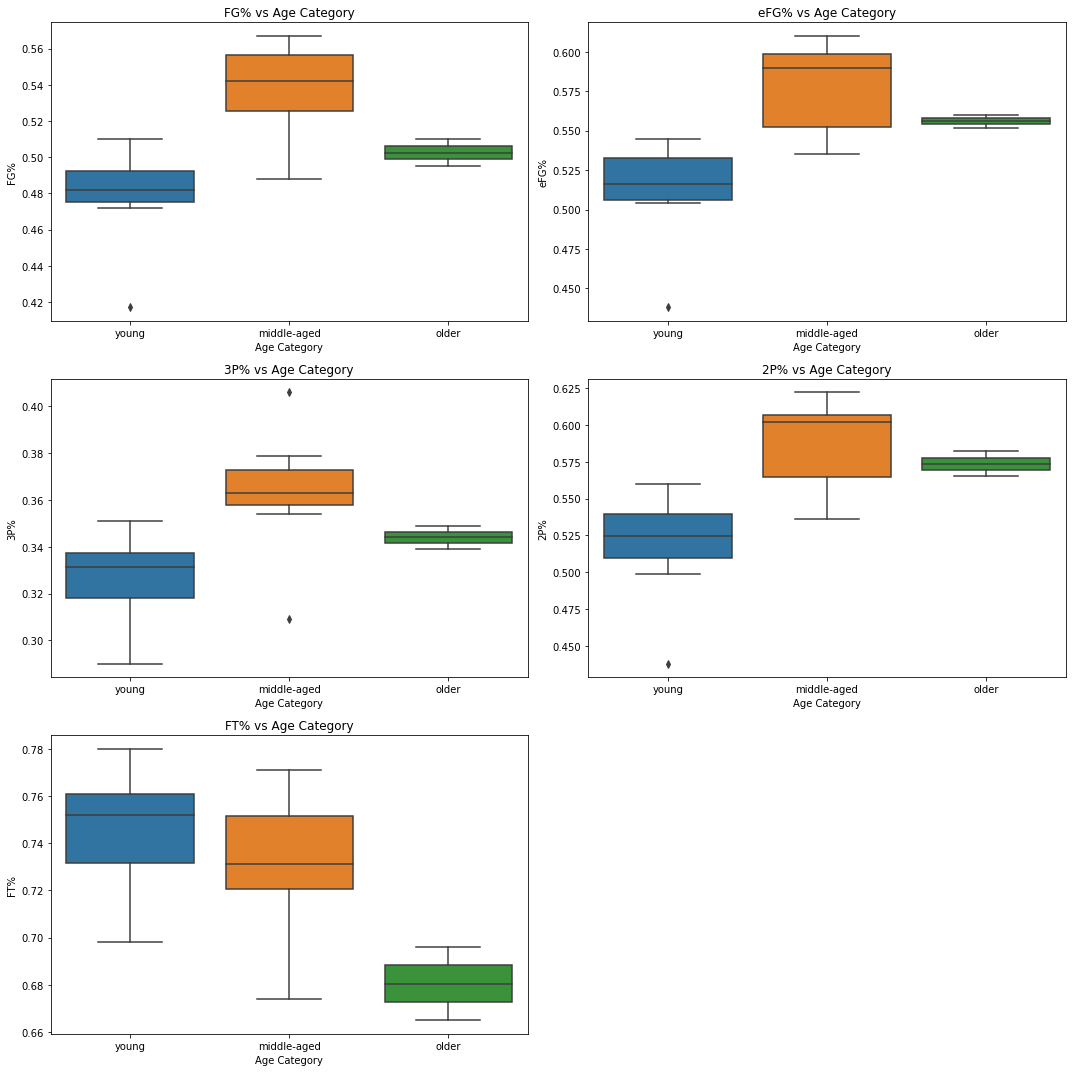

In [76]:
fig = plt.figure(1,(15,15))
i = 0
for col in percentage_cols:
    i += 1
    ax = plt.subplot(3,2,i)
    ax.set_xlabel(col)
    ax.set_title(f"{col} vs Age Category")
    sns.boxplot(x="Age Category",y=col,data=avgs_df)
    plt.tight_layout()
plt.show()

<h2>Insights</h2>
<ul>
    <li>The percentage columns have a maximum of 1 outlier, while some of these statistics have 0 outliers</li>
    <li>This implies Lebron has had a very consistent statistics over his career</li>
    <li>His offensive efficiency statistics mostly peak in the middle-part of his career except for his FT%, which has been on a decline throughout his career</li>
    <li>The spike in the middle of his career is likely a combination of the athleticism and his experience</li>
    <li>Besides FT%, Lebron's percentages are higher in the older section of his career than the younger part of his career, displaying how his experience has played a factor in improving his scoring efficiency</li>
</ul>

In [75]:
def age_cat_to_size(cat):
    if cat == "young":
        return 1
    elif cat == "middle-aged":
        return 2
    return 3

[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


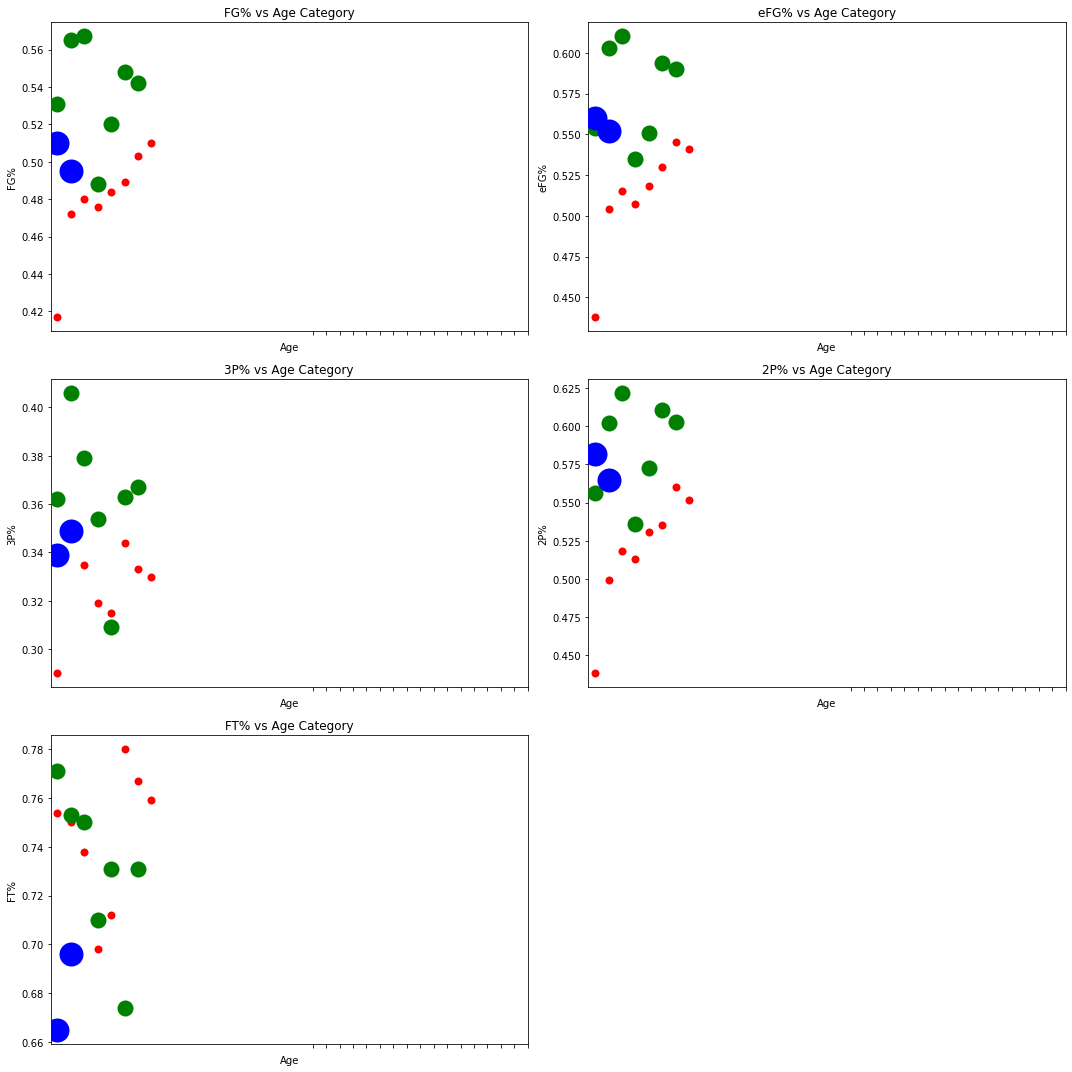

In [137]:
# avgs_df["Age Size"] = avgs_df["Age Category"].apply(lambda x: age_cat_to_size(x))
fig = plt.figure(1,(15,15))
i = 0
min_age = avgs_df["Age"].min()
max_age = avgs_df["Age"].max()
# xticks = np.linspace(min_age,max_age,max_age-min_age+1)
xticks = [x for x in range(int(min_age),int(max_age)+1)]
print(xticks)
for col in percentage_cols:
    i += 1
    ax = plt.subplot(3,2,i)
    ax.set_xlabel(col)
    ax.set_title(f"{col} vs Age Category")
    colors = ["r","g","b"]
    c_idx = -1
    s = 0
    for age_cat in avgs_df["Age Category"].unique():
        c_idx += 1
        s += 8
        data = avgs_df[avgs_df["Age Category"] == age_cat]
        sns.swarmplot(x="Age",y=col,size=s,data=data,color=colors[c_idx])
    plt.set_xticks(xticks)
    plt.tight_layout()
plt.show()
# avgs_df.drop("Age Size", axis=1,inplace=True)